# **Create fashion-MNIST classifier using CNN with keras and TensorFlow**


![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/CleanShot%202020-12-02%20at%204.01.54%402x.png)


First we train a CNN on fashion-MNIST Dataset <br>
Then we re-train it using regulation methods to improve the performances.

---

1. Load, inspect and visualise our data <br>
2. Preprocess data
3. Build a CNN without regularisation
4. Train our CNN
5. Plot loss & accuracy chart
6. Discuss

**1. Load, inspect and visualise data**

In [ ]:
# import dataset
from tensorflow.keras.datasets import fashion_mnist

# load training and test dataset (2 tuples)
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# define our classes
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
           'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# check if GPU is used
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10695048082184587545
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14626652160
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11957374841493704440
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [ ]:
# inspect the shape of our data
print(f"the length of training images is {x_train.shape}")
print(f"the length of testing images is {x_test.shape}")

print(f"labels in training set : {y_train.shape}")
print(f"labels in testing set : {y_test.shape}")

the length of training images is (60000, 28, 28)
the length of testing images is (10000, 28, 28)
labels in training set : (60000,)
labels in testing set : (10000,)


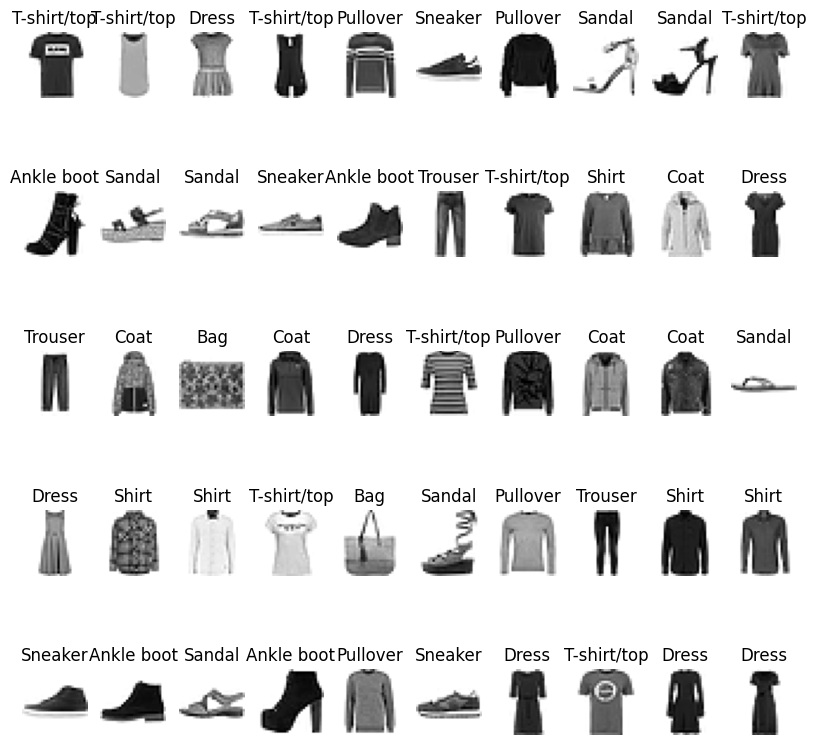

In [ ]:
# plot 50 samples of training set

import matplotlib.pyplot as plt

figure = plt.figure(figsize=(10, 10))
num_of_images = 50

for index in range(1, num_of_images+1):
  class_name = classes[y_train[index]]
  plt.subplot(5, 10, index)
  plt.title(class_name)
  plt.axis('off')
  plt.imshow(x_train[index], cmap='gray_r')




**2. Data Preprocessing** <br> <br>
1. reshape our dataset by adding 4th dimension
4. One hot encoder

In [ ]:
# reshape the images dimension to h,w, channel=1
img_row, img_col = x_train[0].shape[0], x_train[0].shape[1]

input_shape = (img_row, img_col, 1)
print(f'the shape of input images is : {input_shape}')

the shape of input images is : (28, 28, 1)


**One hot encoder**

Converts a class vector (integers) to binary class matrix.<br>
for exp : 4 -> array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)
![Image of one hot ncoding](https://raw.githubusercontent.com/rajeevratan84/DeepLearningCV/master/hotoneencode.JPG)



In [ ]:
# One Hot Encode our label
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(f" the new shape of training labels : {y_train.shape}")
print(f" the new shape of testing labels : {y_test.shape}")


 the new shape of training labels : (60000, 10)
 the new shape of testing labels : (10000, 10)


In [ ]:
# define the number of classes
num_classes = y_train.shape[1]
print(f'Number of classes is : {num_classes}')

Number of classes is : 10


**3. Build our model**

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/CleanShot%202020-11-29%20at%204.21.04%402x.png)

- We're constructing a simple but effective CNN that uses 32 filters of size 3x3
- We've added a 2nd CONV layer of 64 filters of the same size 3x3
- We then downsample our data to 2x2
- We then flatten our Max Pool output that is connected to a Dense/FC layer that has an output size of 128
- Then we connect our 128 outputs to another FC/Dense layer that outputs to the 10 categorical units

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD

# create model
model = Sequential()

# add all layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, 3, activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# compile our model, means create an object to store our model
# we set our optimizer, moss function and metrics
model.compile(loss='categorical_crossentropy', optimizer = SGD(0.001), metrics=['accuracy'])

# We can use the summary function to display our model layers and parameters
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

  **3. Train our model**

  Our preprocessed data is used as the input

In [ ]:
# set our Batch size and Epochs
batch_size = 32
epochs = 15

# Store our results here so we can plot later
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

# We obtain our accuracy score using the evalute function
# Score holds two values, our Test loss and Accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/15
1875/1875 [==============================] - 13s 5ms/step - loss: 0.6987 - accuracy: 0.8256 - val_loss: 0.4040 - val_accuracy: 0.8573
Epoch 2/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3457 - accuracy: 0.8773 - val_loss: 0.3558 - val_accuracy: 0.8722
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3000 - accuracy: 0.8931 - val_loss: 0.3286 - val_accuracy: 0.8815
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2701 - accuracy: 0.9022 - val_loss: 0.3201 - val_accuracy: 0.8844
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2465 - accuracy: 0.9115 - val_loss: 0.3146 - val_accuracy: 0.8904
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2278 - accuracy: 0.9169 - val_loss: 0.2982 - val_accuracy: 0.8920
Epoch 7/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2091 - accuracy: 0.9244 - val_loss: 0.3185 - val_accuracy

**7. Plot loss and accuracy chart**

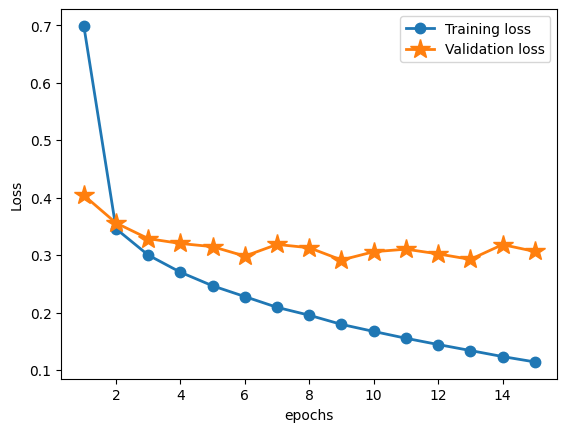

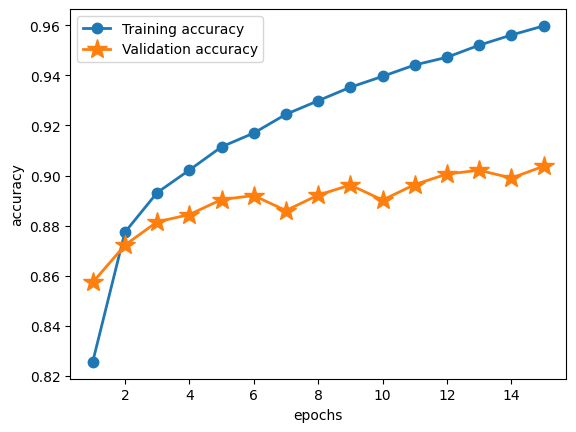

In [ ]:
# Plotting our loss charts
import matplotlib.pyplot as plt

# Use the History object we created to get our saved performance results
history_dict = history.history

# Extract the loss and validation losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

# Get the number of epochs and create an array up to that number using range()
epochs = range(1, len(loss_values) + 1)

# Plot line charts for both Validation and Training Loss
# plot loss
line1 = plt.plot(epochs, loss_values, label='Training loss')
line2 = plt.plot(epochs, val_loss_values, label='Validation loss')
plt.setp(line1, linewidth=2, marker = '.', markersize=15)
plt.setp(line2, linewidth=2, marker = '*', markersize=15)
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# plot accuracy
line1 = plt.plot(epochs, accuracy_values, label='Training accuracy')
line2 = plt.plot(epochs, val_accuracy_values, label='Validation accuracy')
plt.setp(line1, linewidth=2, marker = '.', markersize=15)
plt.setp(line2, linewidth=2, marker = '*', markersize=15)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

We notice the presence of **overfitting** phenomenon.
So we'll try to avoid it by using **regularisation methods**.